#**AUTO ML Analysis on Health & Development Indicators: Global Insights Dataset**

#**Abstract**

The focus of the previous notebook was to conduct a comprehensive analysis of the "Health & Development Indicators: Global Insights" dataset. To accomplish this, I started with data preprocessing tasks such as data cleaning, handling missing values, and encoding categorical variables including exploratory data analysis to identify patterns, trends, and relationships within the dataset.

In this Notebook, I have used H2O.ai to create predictive models and interpret them. Within this notebook, I have used various methods and techniques to understand the difference between the model generated as well as between the dataset before and after loading it as an H2O data frame.

At the end of the notebook, I have answered a few questions, about this whole process and my findings.


#**About the Dataset**

Dataset Name: **Health & Development Indicators: Global Insights**

Taken from: **Kaggle**

**This dataset has 1649 observations with 22 variables.**


###**Column Descriptions:**
1. **Country**: The name of the country.
2. **Year**: The year of data recording.
3. **Status**: The status of the country, either developing or developed
4. **Life Expectancy**: The average number of years a newborn, person at different age ranges, or the entire population is expected to live.
5. **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population.
6. **Infant Deaths**: Number of infant deaths per 1000 live births.
7. **Alcohol**: Alcohol consumption per capita (in liters of pure alcohol).
8. **Percentage Expenditure**: Expenditure on health as a percentage of total government spending or GDP.
9. **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (percentage).
10. **Measles**: Measles immunization coverage among 1-year-olds (percentage).
11. **BMI**: The Average Body Mass indices of people in different countries (kg/m^2).
12. **Under-five deaths**: Number of children that have died at ages less than 5 years old.
13. **Polio**: Polio immunization coverage in each country (percentage).
14. **Total Expenditure**: Total health expenditure per capita.
15. **Diphtheria**: Diphtheria immunization coverage in each country (percentage).
16. **HIV/AIDS**: HIV/AIDS Death rate per 1000 population.
17. **GDP**: Gross Domestic Product per capita.
18. **Population**: The total Population increased in every country over the years.
19. **Thinness 1-19 years**: Prevalence of thinness of children between 1-19 years old (percentage).
20. **Thinness 5-9 years**: Prevalence of thinness of children between 5-9 years old (percentage).
21. **Income composition of resources**: Human Development Index income composition (range between 0-1).
22. **Schooling**: Number of years of schooling.

###Installing H2O

"pip install" is a common command in Python to add external code from the PyPI (Python Package Index) repository.



In [1]:
pip install --no-cache-dir flask --user


In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=30fd2aebb08179a0a26eecbf81a70051a01461dc164c4db6d2df8ee575c7663d
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


###Importing the required libraries

The Python "import" keyword brings in external modules or packages, while "from" is used to import specific objects or functions from a module.

In [3]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

####Initialising the H2O cluster

In [4]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0r36n2rn
  JVM stdout: /tmp/tmp0r36n2rn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0r36n2rn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_m06oks
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


###Data Preparation

We will be using a Kaggle dataset on **Health & Development Indicators: Global Insights** which has 20 Numerical columns and 2 Categorical columns. The dataset provides information about Life Expectancy with respect to different countries with the help of variables such as BMI, Infant Deaths, Adult Mortality, etc.

So visibly, our predictor variable is the "Life Expectancy" column.

In [5]:
#reading the dataset
import pandas as pd
pandas_df = pd.read_csv('https://raw.githubusercontent.com/akshitapathania7/AutoML_Assignment2_Health_Development_Indicators_Global_Insights/main/Life_Expectancy_Data.csv')



In [6]:
#exploring the dataset columns
pandas_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

**Also we can see a few discrepancies in the names of the columns, so let us change that into something more easily readable.**

In [8]:
pandas_df = pandas_df.rename(columns={'Life expectancy ': 'Life expectancy'})
pandas_df = pandas_df.rename(columns={'Measles ': 'Measles'})
pandas_df = pandas_df.rename(columns={'infant deaths': 'Infant deaths'})
pandas_df = pandas_df.rename(columns={'percentage expenditure': 'Percentage expenditure'})
pandas_df = pandas_df.rename(columns={' BMI ': 'BMI'})
pandas_df = pandas_df.rename(columns={'under-five deaths ': 'Under-five deaths'})
pandas_df = pandas_df.rename(columns={'Diphtheria ': 'Diphtheria'})
pandas_df = pandas_df.rename(columns={' HIV/AIDS': 'HIV/AIDS'})
pandas_df = pandas_df.rename(columns={' thinness  1-19 years': 'Thinness 1-19 years'})
pandas_df = pandas_df.rename(columns={' thinness 5-9 years': 'Thinness 5-9 years'})

Now the column names are easy to read

In [9]:
pandas_df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
uniques = pandas_df['Country'].unique()
print(uniques)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'Nicaragua' 'N

In [11]:
uniques = pandas_df['Status'].unique()
print(uniques)

['Developing' 'Developed']


**We will be encoding the "Country" and "Status" columns for further use, as they can be a factor in determining Life expectancy.**

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Country', 'Status']

# Apply label encoding to each column
for column in columns_to_encode:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

In [13]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int64  
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int64  
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   Infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five deaths                1649 non-null   int64  
 12  Polio               

In [14]:
pandas_df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,132,2004,1,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,132,2003,1,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,132,2002,1,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,132,2001,1,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
import numpy as np

#gives us the list of numerical columns and categorical columns
numerical_col = pandas_df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = pandas_df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


As we have encoded the "Country" and "Status" column, we do not have any categorical columns now.

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining the predictor variables (independent variables)
X = pandas_df[numerical_col]

# Adding a constant term (intercept) to the predictors
X = sm.add_constant(X)

# Calculating the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif["VIF"] = vif["VIF"].round(3)
# Displaying the VIF values
print(vif)

                           Variable         VIF
0                             const  286187.675
1                           Country       1.072
2                              Year       1.182
3                            Status       1.844
4                   Life expectancy       6.196
5                   Adult Mortality       2.154
6                     Infant deaths     223.933
7                           Alcohol       2.449
8            Percentage expenditure      12.943
9                       Hepatitis B       1.693
10                          Measles       1.519
11                              BMI       1.835
12                Under-five deaths     214.162
13                            Polio       1.730
14                Total expenditure       1.130
15                       Diphtheria       2.107
16                         HIV/AIDS       2.117
17                              GDP      13.717
18                       Population       1.945
19              Thinness 1-19 years     

It prints out the VIF values, and we can inspect them to identify variables with high multicollinearity (typically VIF values greater than 5 are considered high)

So columns like "Life expectancy", "Infant deaths", "Percentage expenditure", "Under-five deaths", "GDP", "Thinness 1-19 years", and "Thinness 5-9 years" are considered to have high multicollinearity.

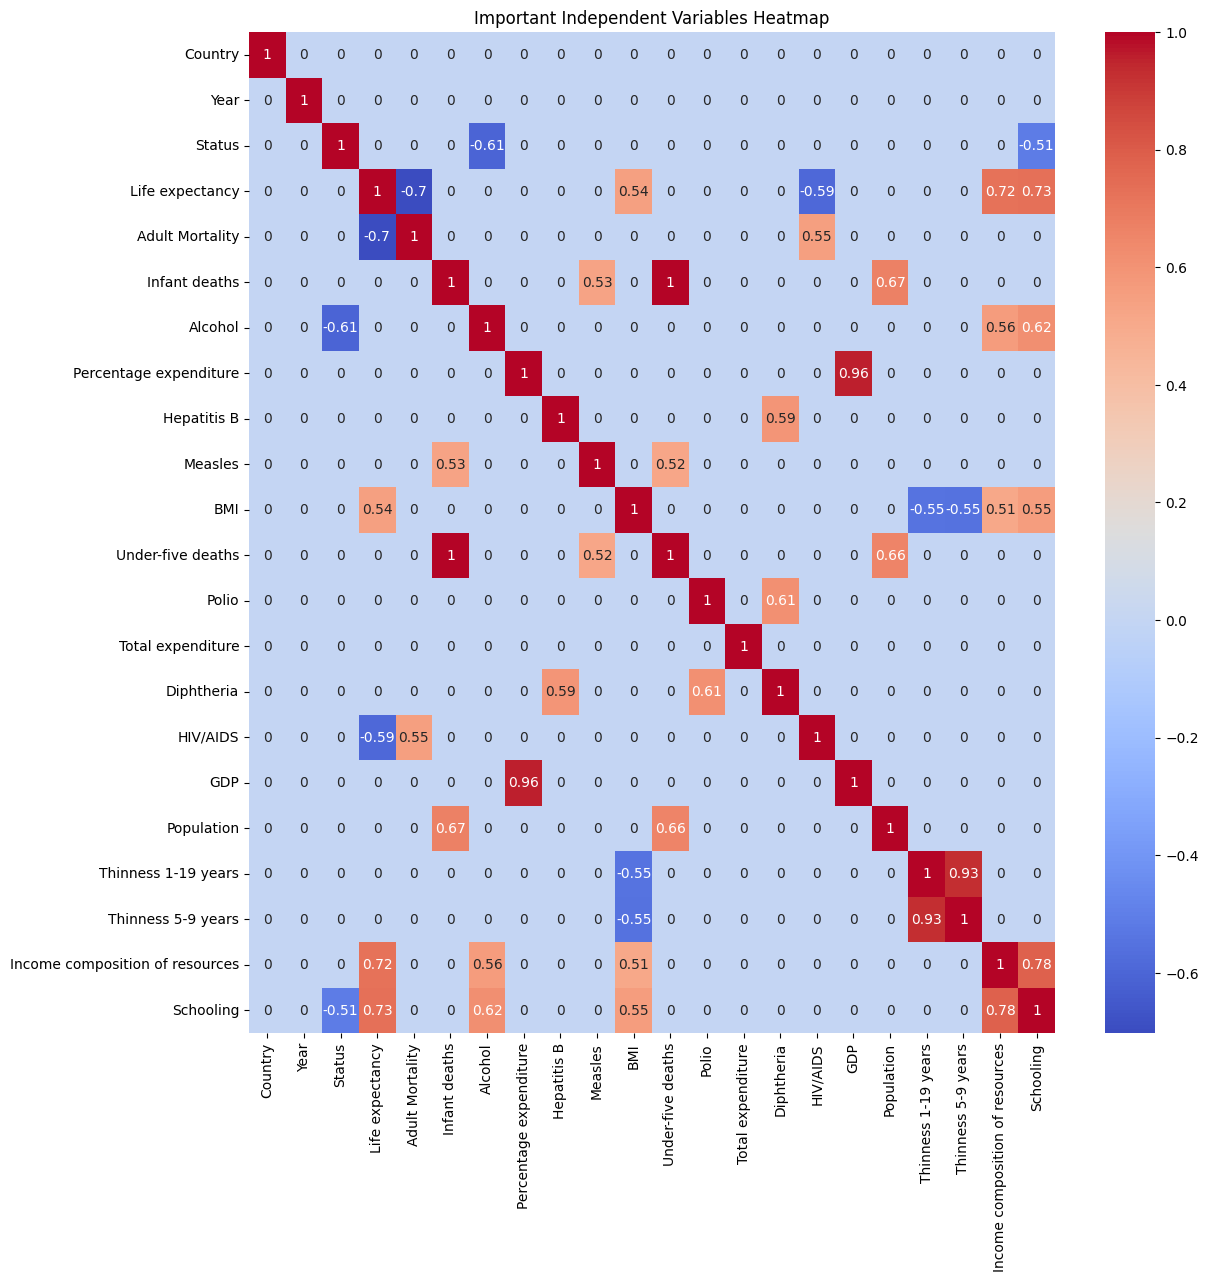

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pandas_df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(13, 13))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

Variables with **high positive** or **negative** correlation are likely useful for predicting life expectancy in a regression model.

Columns like **"Year"**, **"Country"**, and **"Total expenditure"** are have **no relationship** with **"Life expectancy"**

The correlation **close to 1** indicates that it is **strongly correlated**, and the values closer to **0 are a weak correlation**

##Execution of the H20 AutoML

###**Load the dataset as a H2O dataframe**

In [18]:
df = h2o.H2OFrame(pandas_df)  # Converted Dataframe to H2O data frame to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
df

Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
0,2014,1,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
0,2013,1,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e+07,17.7,17.7,0.47,9.9
0,2012,1,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e+06,17.9,18,0.463,9.8
0,2011,1,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e+06,18.2,18.2,0.454,9.5
0,2010,1,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2.88317e+06,18.4,18.4,0.448,9.2
0,2009,1,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9
0,2008,1,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2.72943e+06,18.8,18.9,0.433,8.7
0,2007,1,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,2.66168e+07,19,19.1,0.415,8.4
0,2006,1,57.3,295,84,0.03,17.1715,64,1990,14.7,116,58,7.43,58,0.1,272.564,2.58934e+06,19.2,19.3,0.405,8.1


H2O provides a sample dataset of 10 rows with summary statistics for numerical columns.

The following chunk gives the information about the dataset concerning the following:

- **type:** This indicates the data type of the column.

- **mean:** This is the average value (mean) for each numerical column.

- **maxs:** This indicates the maximum value for each numerical column. It represents the largest value present in that column.

- **sigma:** Sigma measures the degree of variation in data points for each numerical column. A higher standard deviation indicates greater dispersion from the mean.

- **zeros:** This is the count of zero values in each numerical column.

- **missing_mean:** This statistic provides the mean of non-missing values in numerical columns with missing or NA entries.

In [20]:
df.describe(chunk_summary=True)

Rows:1649
Cols:22

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     1        4.54545             277  B   0.294027
C1N           1-Byte Integers (w/o NAs)  4        18.1818             6.7 KB   7.29017
C1S           1-Byte Fractions           2        9.09091             3.4 KB   3.67905
C2            2-Byte Integers            3        13.6364             9.9 KB   10.7187
C2S           2-Byte Fractions           8        36.3636             26.4 KB  28.7191
C4            4-Byte Integers            1        4.54545             6.5 KB   7.07363
C8D           64-bit Reals               3        13.6364             38.8 KB  42.2253

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  92.0 KB  1649              1                              22
mean             92.0 KB  1649              1                              22
min              92.0 KB  1649              1                              22
max              92.0 KB  1649              1                              22
stddev           0  B     0                 0                              0
total            92.0 KB  1649              1                              22

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
type,int,int,int,real,int,int,real,real,int,int,real,int,int,real,int,real,real,real,real,real,real,real
mins,0.0,2000.0,0.0,44.0,1.0,0.0,0.01,0.0,2.0,0.0,2.0,0.0,3.0,0.74,2.0,0.1,1.68135,34.0,0.1,0.1,0.0,4.2
mean,66.19345057610673,2007.8405093996362,0.853244390539721,69.30230442692537,168.2152819890845,32.55306246209824,4.533195876288667,698.9735580496965,79.21770770163727,2224.494238932691,38.12862340812607,44.22013341419045,83.5645845967252,5.955924802910865,84.15524560339605,1.983869011522133,5566.0318868175755,14653625.889484541,4.850636749545185,4.9077622801698055,0.6315512431776829,12.119890842935115
maxs,132.0,2015.0,1.0,89.0,723.0,1600.0,17.87,18961.3486,99.0,131441.0,77.1,2100.0,99.0,14.39,99.0,50.6,119172.7418,1293859294.0,27.2,28.2,0.936,20.7
sigma,38.89200638900635,4.087710534059056,0.35396946562011683,8.796834135238601,125.31041693156172,120.84719049638885,4.029188999208425,1759.2293363477393,25.60466388103202,10085.802018707056,19.75424940421043,162.89799858781032,22.450557485191844,2.2993854200363937,21.579192843796623,6.032359689186714,11475.900117274561,70460393.4030564,4.599228369708468,4.653756745508691,0.18308872643487184,2.795387538952672
zeros,16,0,242,0,0,395,0,5,0,554,0,353,0,0,0,0,0,0,0,0,48,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,2015.0,1.0,65.0,263.0,62.0,0.01,71.27962362,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,59.9,271.0,64.0,0.01,73.52358168,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,59.9,268.0,66.0,0.01,73.21924272,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9


**Splitting the Dataset**

It is essential to divide the dataset into separate training and testing sets. Doing so plays a critical role in evaluating the model's performance.

In [21]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

**Training the AutoML model**

Below:

- **max_model:** It specifies the maximum number of individual models that AutoML will train during the search for the best model.
- **balance_classes:** When set to TRUE, AutoML adjusts the class distribution in the training data to be balanced.
- **seed:** The seed parameter allows you to set a random seed for reproducibility.

In [22]:
auto_ml = H2OAutoML(max_models =15, balance_classes=True, seed =1)

**Now we start the training process by specifying:**

- **training_frame:** The training_frame parameter is used to specify the H2O data frame that contains your training dataset.
- **y:** The y parameter specifies the response variable for ML model prediction. "Life expectancy" according to our dataset

**Understanding the Parameters after the training process:**

- **Mean Squared Error (MSE):** The Mean Squared Error (MSE) measures the average of the squared differences between predicted and actual values.

- **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models as it's a measure of how well the model can predict the actual values.

- **Mean Absolute Error (MAE):** The MAE is the average absolute difference between predicted and actual values, calculated by taking the average of their absolute differences.

- **Root Mean Squared Logarithmic Error (RMSLE):** RMSLE is a variation of RMSE used in regression models with a wide range of values. It calculates the square root of the average squared difference between the logarithms of predicted and actual values.

- **Mean Residual Deviance:** The Mean Residual Deviance measures the average difference between predicted and actual values, normalized by the degrees of freedom.

- **R-squared (R^2):** The R-squared is a statistical measure that indicates how well a model fits the data. It quantifies the proportion of the variance in the dependent variable that can be explained by the independent variables. 1 means the model accounts for all variability, and 0 means it does not account for any.

- **Null Degrees of Freedom:** The Null Degrees of Freedom equals the number of observations minus 1. It represents independent observations in the dataset based on the number of parameters in the model.

- **Residual Degrees of Freedom:** The Residual Degrees of Freedom in statistical modeling is the number of independent observations in the dataset that can vary after adjusting for the number of parameters involved in the model.

- **Null Deviance:** The Null Deviance is the deviance of the null model with no independent variables, representing the unexplained variance in the dependent variable.

- **Residual Deviance:** The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- **Akaike Information Criterion (AIC):** The AIC measures a model's quality, factoring in its complexity. It's calculated by subtracting the logarithm of the model's likelihood from twice the number of parameters. Lower values indicate better quality.

In [23]:
auto_ml.train(training_frame = train, y = 'Life expectancy')

AutoML progress: |██████████████
01:44:10.912: DeepLearning_1_AutoML_1_20231103_14237 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20231103_14237_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


█████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/28
# GBM base models (used / total),8/20
# XGBoost base models (used / total),1/5
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


From the statistics above for the train and cross-validation data we can infer that:

**Train Data**

- The **MSE** score of **0.146** shows that there is a very small squared difference between predicted and actual values in the training data.
- The **RMSE** score of **0.382** proves that the model is providing highly accurate predictions.
- With an **MAE** of roughly **0.262**, it is evident that the predicted values are extremely close to the actual values, indicating a high level of accuracy.
- The **RMSLE** of about **0.0058** indicates the model's predictions closely align with actual values when considering logarithms.
- The model fits the training data extremely well with an **R-squared value** of approximately **0.998**, indicating that it explains a vast majority of the variance in the training data.
- The **null deviance** measures unexplained variance without predictors, while the **residual deviance** measures it with the model applied. A small residual deviance indicates a significant reduction in unexplained variance due to the model.
- The **AIC** value of approximately **1237.06** indicates a good balance between model fit and complexity, with lower values suggesting better models.

**Cross-Validation Data**

- The higher **MSE** on cross-validation data (approx. **2.67**) is expected as the model hasn't seen this data during training. Nonetheless, it suggests relatively accurate predictions on new, unseen data.
- The cross-validation data **RMSE** of approximately **1.635** is higher than the training data's, but it still suggests relatively accurate predictions.
- The **MAE** of approximately **0.986** on cross-validation data is also higher than on the training data but remains at a reasonable level.
- The cross-validation data shows a low **RMSLE** of approximately **0.0248**, indicating strong alignment between predicted and actual values on a logarithmic scale.
- The model's high **R-squared value** on cross-validation data (approximately **0.965**) indicates that it is able to explain a significant portion of the variance in this new data, suggesting good generalization.
- The **null deviance** and **residual deviance** on cross-validation data indicate that the model has reduced unexplained variance compared to a null model, even on new data.
- It's worth noting that the **AIC** value on the cross-validation data is extremely high (around **5084.19**) than on the training data. However, it's important to keep in mind that AIC is a relative measure, and lower values are always better. Despite the increase in AIC on cross-validation, it still suggests that the model is a good fit.

###Evaluation

Once the models are trained, we can evaluate their performance using a leaderboard generated by H2O AutoML. The leaderboard ranks the trained models based on a predefined metric. By default, it ranks the models in ascending order of log loss and RMSE for classification and regression tasks respectively.

In [24]:
lb = auto_ml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231103_14237,1.6356,2.6752,0.986123,0.0248201,2.6752
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_14237,1.67987,2.82197,1.01646,0.0253327,2.82197
GBM_grid_1_AutoML_1_20231103_14237_model_13,1.69559,2.87501,1.03244,0.0256579,2.87501
GBM_4_AutoML_1_20231103_14237,1.70161,2.89548,1.05848,0.0256456,2.89548
GBM_grid_1_AutoML_1_20231103_14237_model_6,1.73161,2.99846,1.04892,0.026402,2.99846
GBM_3_AutoML_1_20231103_14237,1.75039,3.06387,1.09637,0.0264909,3.06387
GBM_grid_1_AutoML_1_20231103_14237_model_14,1.75052,3.06433,1.10112,0.0263995,3.06433
GBM_2_AutoML_1_20231103_14237,1.75817,3.09116,1.11564,0.0265483,3.09116
GBM_5_AutoML_1_20231103_14237,1.75883,3.09348,1.12154,0.0265619,3.09348
GBM_grid_1_AutoML_1_20231103_14237_model_9,1.77982,3.16777,1.11943,0.0272642,3.16777


###Finding the best-performing model

In [25]:
best_model = auto_ml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231103_14237


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/28
# GBM base models (used / total)      8/20
# XGBoost base models (used / total)  1/5
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.14658411265464533
RMSE: 0.3828630468648618
MAE: 0.26231623489899647
RMSLE: 0.005811872644576385
Mean Residual Deviance: 0.14658411265464533
R^2: 0.9981069532305106
Null degrees of freedom: 1323
R

This model has the **lowest RMSE**, which is a widely used measure of prediction error in regression problems. However, it is crucial to assess the model based on other metrics and utilize cross-validation to obtain a more accurate estimate of its performance on unseen data.

###Evaluating the best model on a holdout test set using the same evaluation metrics shown above.

In [26]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2.501470281108958
RMSE: 1.5816037054549912
MAE: 0.9678622369753932
RMSLE: 0.02339288056719096
Mean Residual Deviance: 2.501470281108958
R^2: 0.9674913359957397
Null degrees of freedom: 324
Residual degrees of freedom: 315
Null deviance: 25008.17271806577
Residual deviance: 812.9778413604114
AIC: 1242.295614803439

On examining this we can conclude:

- The **MSE** of approximately **2.50** indicates that, on average, the squared difference between the predicted values and the actual values in the test data is relatively small. This suggests that the model is providing reasonably accurate predictions on new data.

- The **RMSE** of approximately **1.58** is a measure of the average absolute error between the predicted and actual values in the test data. It's relatively low, indicating that the model is providing accurate predictions on the test data.

- The **MAE** of approximately **0.96** is also relatively low, suggesting that, on average, the absolute difference between the predicted and actual values is small on the test data.

- The **RMSLE** of approximately **0.0239** is quite low, indicating that the model's predictions closely align with the actual values when considering the logarithm of the values in the test data.

- The **R-squared value** of approximately **0.967** is high, suggesting that the model explains a substantial portion of the variance in the test data. In other words, the model generalizes well to new, unseen data.

- The **null deviance** measures the unexplained variance when no predictors are used, and the **residual deviance** measures the unexplained variance after the model is applied. The model has substantially reduced the unexplained variance, as indicated by the small residual deviance, on the test data.

- The **AIC** value of approximately **1242.29** is relatively low, indicating a good balance between model fit and model complexity for the test data. Lower AIC values suggest better models.

### **H2O AutoML Model Analysis**

In [27]:
#assign index values to all the models generated
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_1_20231103_14237': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_14237': 1,
 'GBM_grid_1_AutoML_1_20231103_14237_model_13': 2,
 'GLM_1_AutoML_1_20231103_14237': 29}

In [28]:
#to display the best model
best_model.algo

'stackedensemble'

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


<ipython-input-29-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

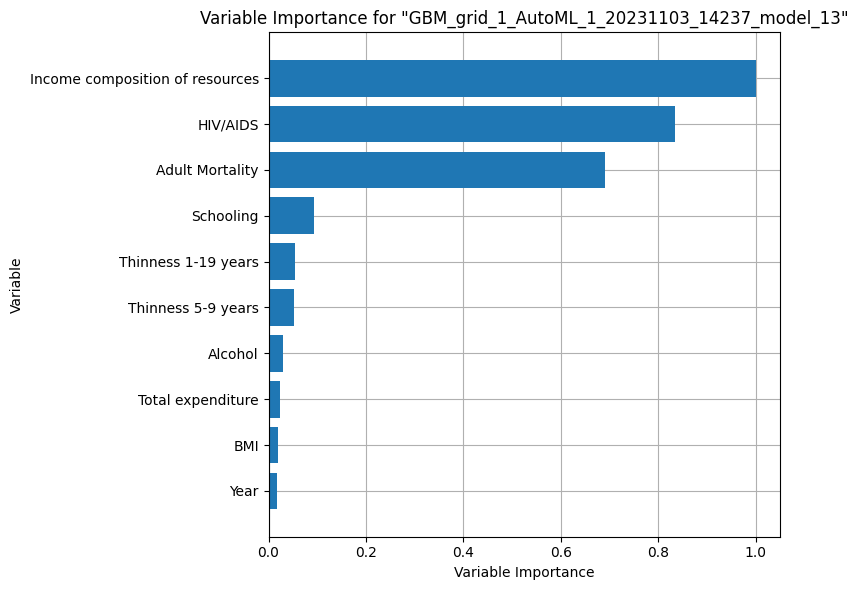

In [30]:
#Variable importance
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

We can Interpret that

**"Income composition of resources"** is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)

**"HIV/AIDS"** is 0.85 (being the second most important variable)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

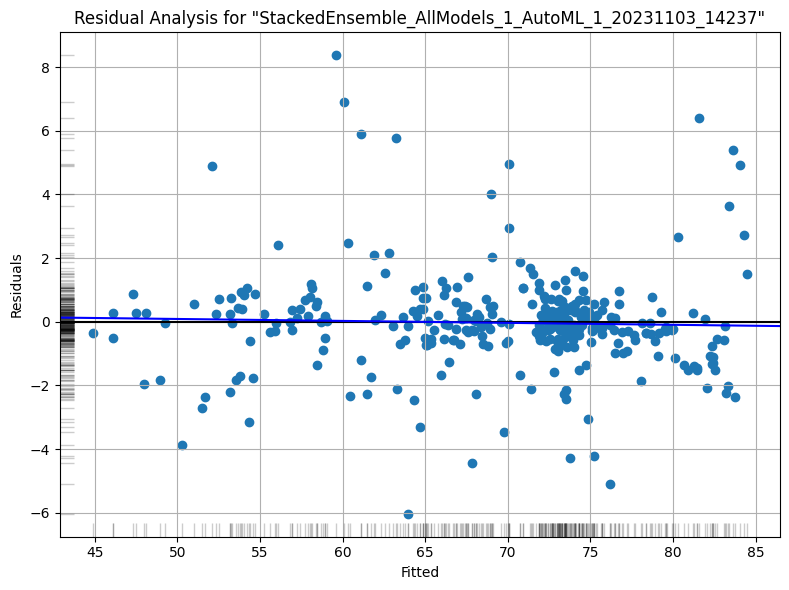

In [31]:
#Residual Analysis
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['residual_analysis'])


The scatter plot displays a distribution of data points that appear to be **randomly distributed** around the **horizontal axis at 0**. This pattern is a positive indication of the model's strong performance, suggesting that the model's predicted values are consistent with the actual values. Overall, the plot suggests that the model has accurately captured the underlying patterns and relationships within the data.

29
Model Name: GLM_1_AutoML_1_20231103_14237


<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-32-af4837305a02>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


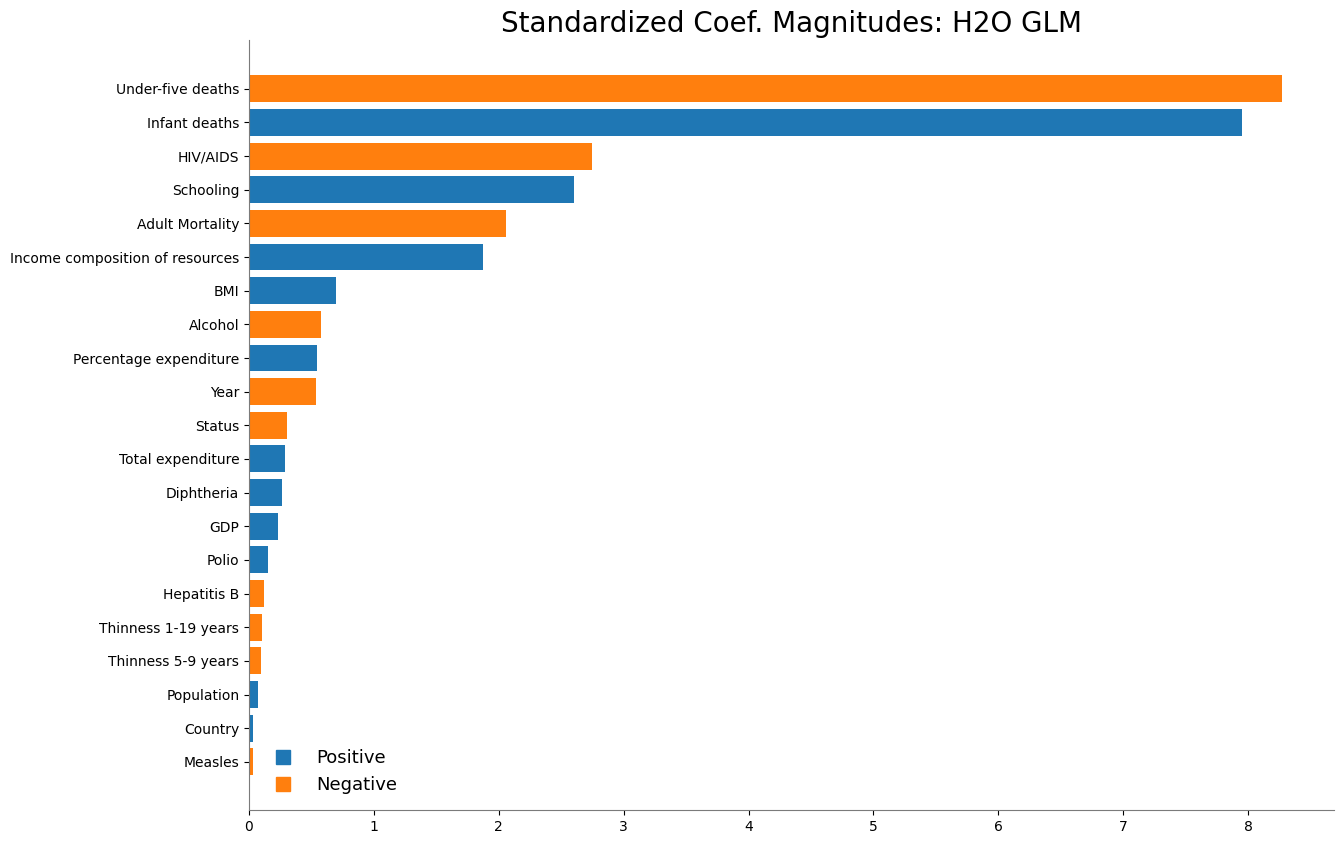

In [32]:
#Standard Coefficient Magnitudes: H2O GLM
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print("Model Name:", glm_model.model_id)
    glm_model.std_coef_plot()


The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable.

A higher magnitude value of **"Under-five deaths"** indicates that the variable has a **stronger** impact on the outcome variable i.e. **"Life expectancy"**.

##**1. Is the relationship significant?**



Below we can notice that most features have **p values** **less than 0.5** and the **R^2 value** is **0.967** which clearly states that the **relationship is significant**. These findings suggest a strong correlation between the analyzed features and provide evidence to support the claim that they are interdependent.

In [33]:
best_model = auto_ml.get_best_model()

In [34]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

df = df.as_data_frame()

model = sm.OLS(df['Life expectancy'], df[['Country', 'Year', 'Status', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.942e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        01:45:35   Log-Likelihood:                         -4443.4
No. Observations:                1649   AIC:                                      8929.
Df Residuals:                    1628   BIC:                                      9042.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Country                             0.0015      0.002      0.617      0.537      -0.003       0.006
Year                                0.0271      0.000     63.298      0.000       0.026       0.028
Status                             -0.9628      0.340     -2.835      0.005      -1.629      -0.297
Adult Mortality                    -0.0167      0.001    -17.487      0.000      -0.019      -0.015
Infant deaths                       0.0948      0.011      8.836      0.000       0.074       0.116
Alcohol                            -0.0807      0.034     -2.408      0.016      -0.146      -0.015
Percentage expenditure              0.0004      0.000      2.131      0.033    3.08e-05       0.001
Hepatitis B                        -0.0072      0.004     -1.619      0.106      -0.016       0.002
Measles                         -7.148e-06   1.08e-05     -0.660      0.510   -2.84e-05    1.41e-05
BMI                                 0.0342      0.006      5.682      0.000       0.022       0.046
Under-five deaths                  -0.0714      0.008     -9.186      0.000      -0.087      -0.056
Polio                               0.0083      0.005      1.595      0.111      -0.002       0.018
Total expenditure                   0.0739      0.041      1.809      0.071      -0.006       0.154
Diphtheria                          0.0153      0.006      2.570      0.010       0.004       0.027
HIV/AIDS                           -0.4363      0.018    -24.116      0.000      -0.472      -0.401
GDP                              5.161e-06   2.85e-05      0.181      0.856   -5.07e-05    6.11e-05
Population                      -6.879e-10   1.76e-09     -0.392      0.695   -4.13e-09    2.76e-09
Thinness 1-19 years                -0.0093      0.054     -0.174      0.862      -0.114       0.096
Thinness 5-9 years                 -0.0497      0.053     -0.942      0.346      -0.153       0.054
Income composition of resources     9.7037      0.836     11.603      0.000       8.063      11.344
Schooling                           0.8619      0.060     14.424      0.000       0.745       0.979
==============================================================================
Omnibus:                       36.403   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.732
Skew:                          -0.154   Prob(JB):                     8.78e-15
Kurtosis:                       3.920   Cond. No.                     6.78e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

In [35]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2.501470281108958
RMSE: 1.5816037054549912
MAE: 0.9678622369753932
RMSLE: 0.02339288056719096
Mean Residual Deviance: 2.501470281108958
R^2: 0.9674913359957397
Null degrees of freedom: 324
Residual degrees of freedom: 315
Null deviance: 25008.17271806577
Residual deviance: 812.9778413604114
AIC: 1242.295614803439

##**2. Are any model assumptions violated?**



Linear regression assumes homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

In the scatterplot below, we notice that Homoscedasticity is indicated if the points in the scatterplot are roughly symmetrically distributed, so it does not violate the assumption

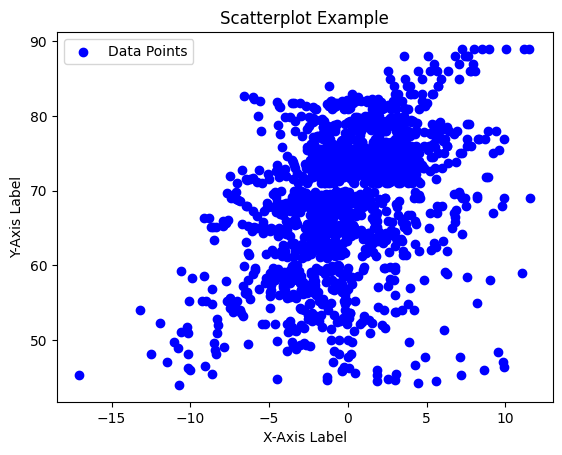

In [36]:
residuals = model.resid
y = df['Life expectancy']

plt.scatter(residuals, y, label='Data Points', color='blue', marker='o')

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatterplot Example')

# Add a legend (if necessary)
plt.legend()

# Show the plot
plt.show()

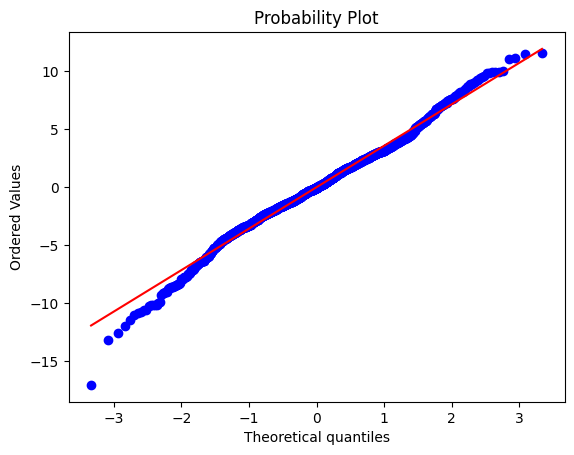

In [37]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Life expectancy', ylabel='Count'>

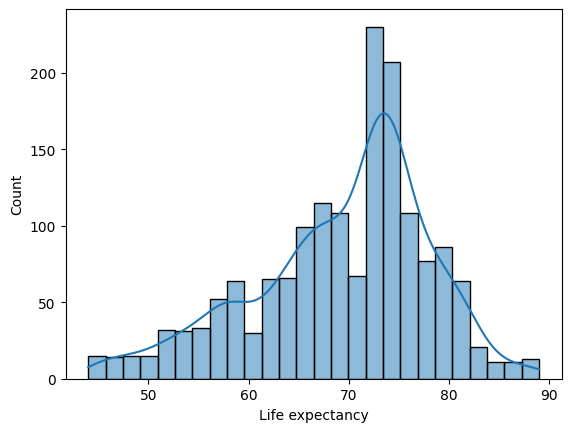

In [38]:
sns.histplot(df['Life expectancy'], kde = True)

Linear regression assumes that there is no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

The below Durbin-Watson statistic (d) value of 0.705 is less than 2 but very close to 0, which indicates a strong presence of positive autocorrelation in the residuals of your regression model, this violates the assumption made.

In [39]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

# Output the test statistic
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 0.7052885471740277


<ipython-input-40-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


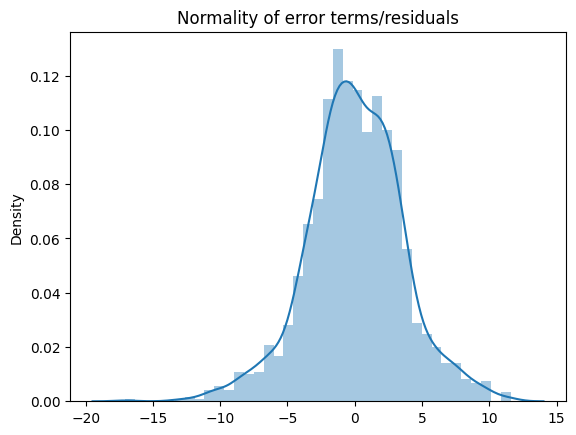

In [40]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other

From the heatmap below, we can confirm that we have a few high absolute values (close to 1) in off-diagonal cells suggesting strong linear relationships between the independent variables.

<Axes: >

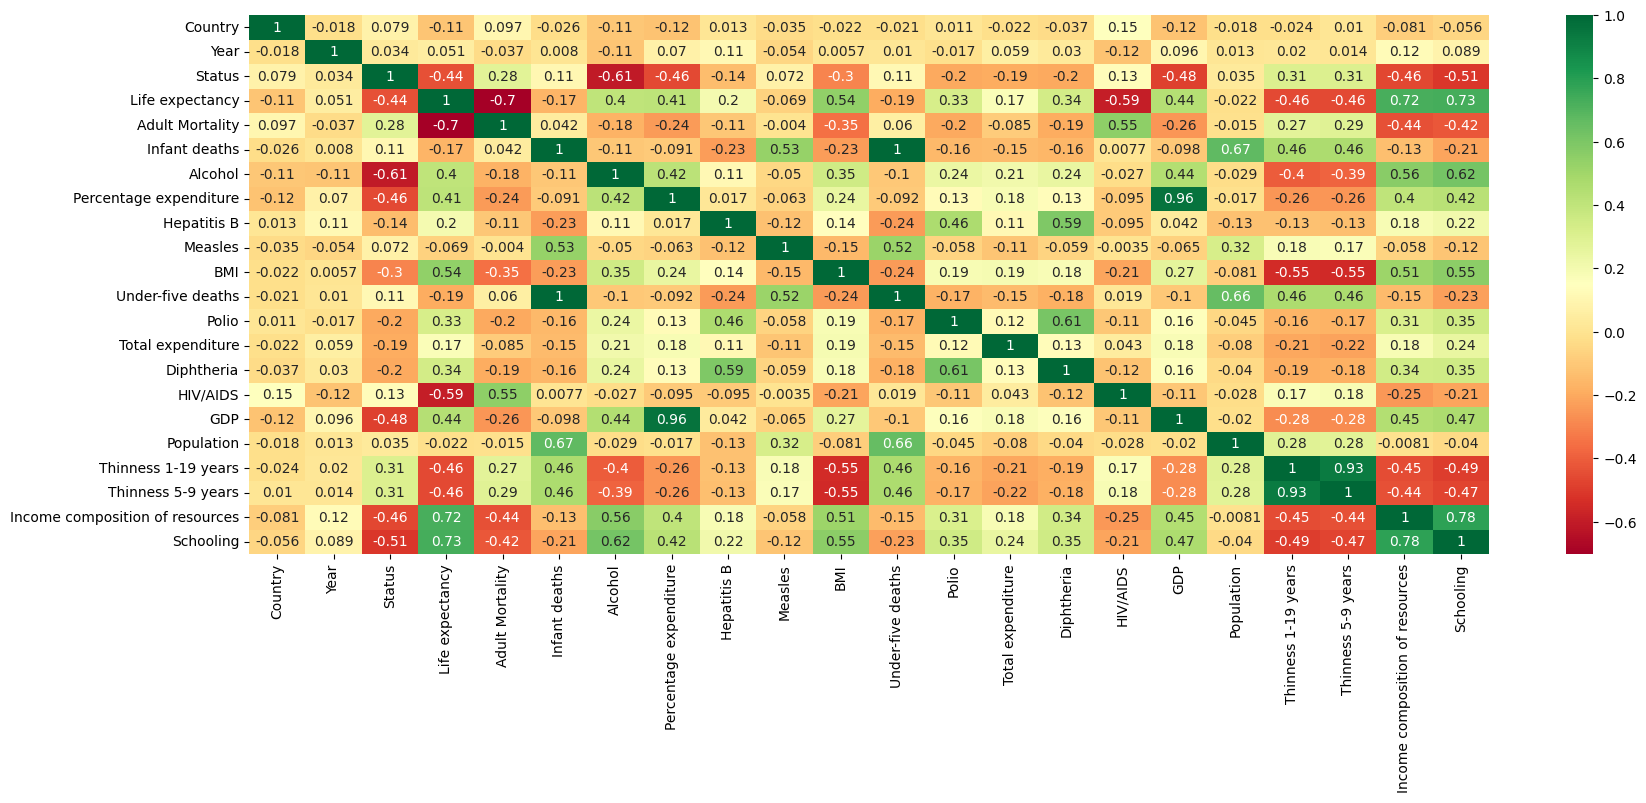

In [41]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")

##**3. Is there any multicollinearity in the model?**

 VIF is a statistic used to measure multicollinearity in a multiple linear regression model. Multicollinearity occurs when two or more independent variables in the model are highly correlated, which can lead to instability in the parameter estimates.

 Below, VIF values a value above 10 tells us that multicollinearity exists.



In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining the predictor variables (independent variables)
X = df[numerical_col]

# Adding a constant term (intercept) to the predictors
X = sm.add_constant(X)

# Calculating the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif["VIF"] = vif["VIF"].round(3)
# Displaying the VIF values
print(vif)

                           Variable         VIF
0                             const  286187.675
1                           Country       1.072
2                              Year       1.182
3                            Status       1.844
4                   Life expectancy       6.196
5                   Adult Mortality       2.154
6                     Infant deaths     223.933
7                           Alcohol       2.449
8            Percentage expenditure      12.943
9                       Hepatitis B       1.693
10                          Measles       1.519
11                              BMI       1.835
12                Under-five deaths     214.162
13                            Polio       1.730
14                Total expenditure       1.130
15                       Diphtheria       2.107
16                         HIV/AIDS       2.117
17                              GDP      13.717
18                       Population       1.945
19              Thinness 1-19 years     

'Infant deaths', 'Percentage expenditure', 'Under-five deaths', 'GDP' are all high correlated.

##**4. In the multivariate models are predictor variables independent of all the other predictor variables?**



To show if the predictor variables are independent of all other predictor variables, I have used a heatmap to see the trend.

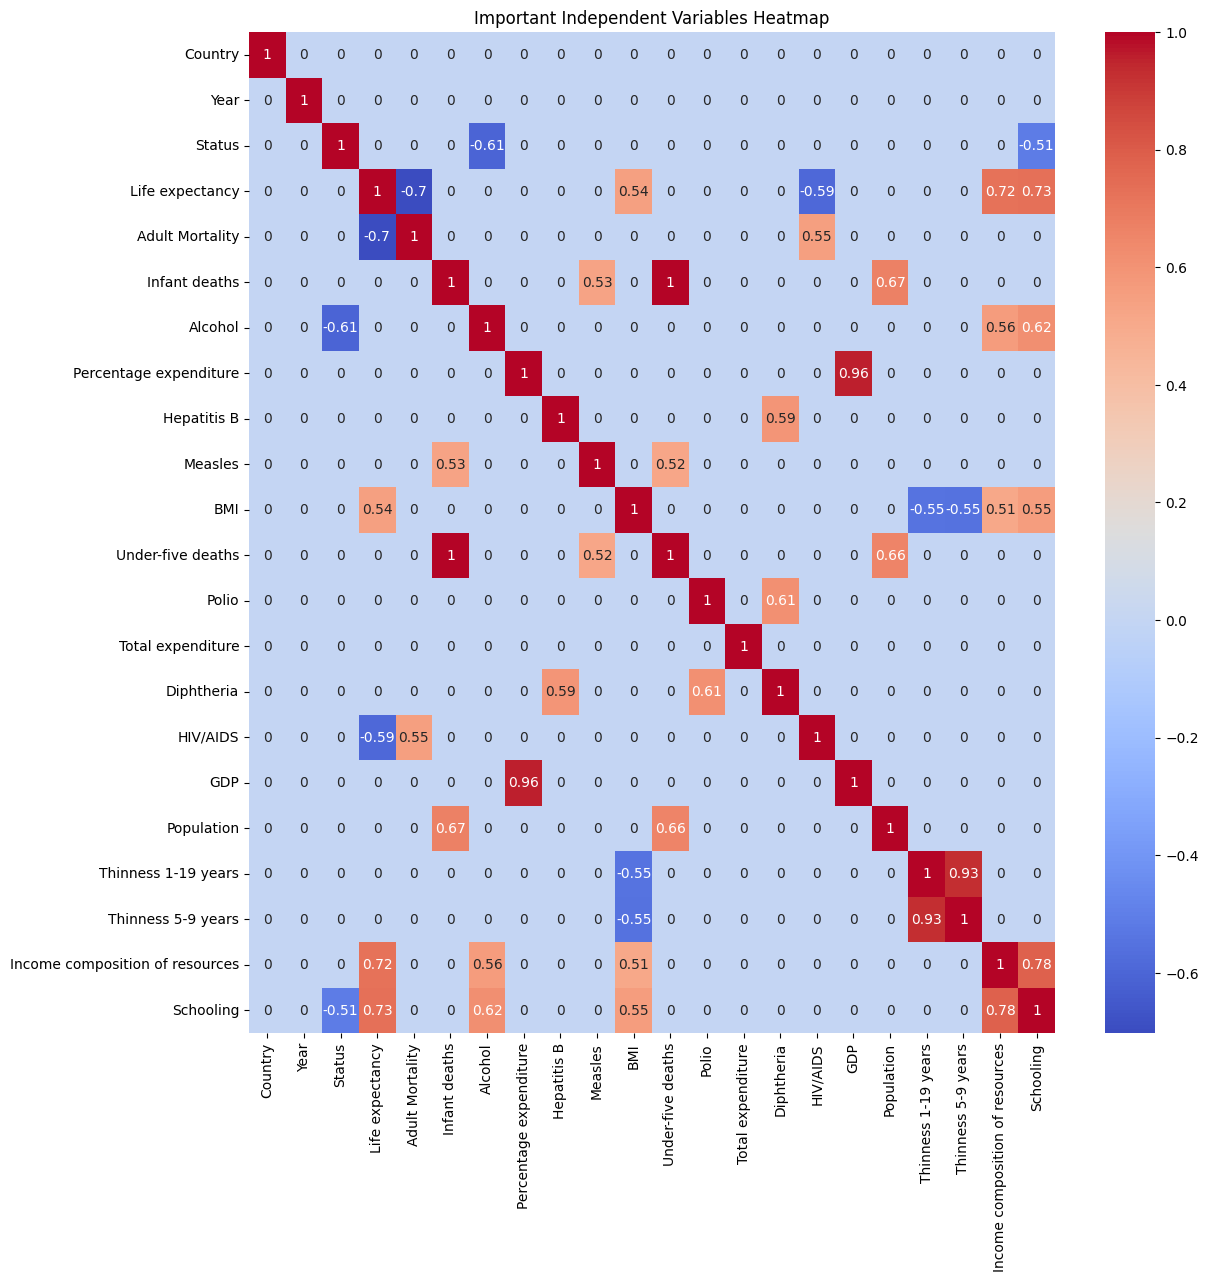

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(13, 13))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

From the above heatmap I can confirm that 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources' and 'Schooling' are correlated with the predictor variable 'Life expectancy'

##**5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**



"ELI5" is used for explaining linear regression in a simplified and easy-to-understand manner because linear regression is one of the fundamental concepts in statistics and machine learning.

We will use Eli5 to list the most significant predictor variables.

In [44]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=a6b64cb6012ec3cccd7365509e1de8e8f2522ce8c24903c62c955a30cab1c606
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [45]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Creating linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [47]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist(), top=7)

From the above eli5 weights, we can see that 'Under-five deaths', 'Infant deaths', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', and 'Schooling' are correlated with the predictor variable 'Life expectancy'. This does confirm our previous analysis of the important features that impact our predictor variable 'Life expectancy'.

##**6. Does the model make sense?**

Typically, for a model to make sense it should follow all the assumptions and have p-value, and VIF between their respective ranges.

RMSE should be as low as possible considering the minimum and maximum values of the target variable, for our model the RMSE= 1.58, which is significantly higher for the model to make sense.

To improve the accuracy of a predictive model, data scientists can perform various techniques such as feature selection, which involves dropping less important variables that do not contribute much to the model's performance.

Additionally, they can handle outliers by removing them entirely or boosting their influence on the model. Implementing ensemble models, which combine several individual models to obtain a more accurate prediction, is also an option.

In [48]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2.501470281108958
RMSE: 1.5816037054549912
MAE: 0.9678622369753932
RMSLE: 0.02339288056719096
Mean Residual Deviance: 2.501470281108958
R^2: 0.9674913359957397
Null degrees of freedom: 324
Residual degrees of freedom: 315
Null deviance: 25008.17271806577
Residual deviance: 812.9778413604114
AIC: 1242.295614803439

##**7. Does regularization help?**

We will be finding out different trends between models before and after being regularised.

In [49]:
#genereating models with and without regularisation

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
df_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
df_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [50]:
#genereating models with and without regularisation

df_glm.train(y = 'Life expectancy', training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698975735935_22


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              21                            21                             1                       py_2_sid_810d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 12.688871212110545
RMSE: 3.562144187439715
MAE: 2.736475707591707
RMSLE: 0.05422836191300041
Mean Residual Deviance: 12.688871212110545
R^2: 0.8361307632761917
Null degrees of freedom: 1323
Residual degrees of freedom: 1302
Null deviance: 102521.1676133353
Residual deviance: 16800.065484834362
AIC: 7167.269568600709

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2023-11-03 01:45:58  0.000 sec   0             102521.16600453173         77.43290483725961
    2023-11-03 01:45:58  0.092 sec   1                                                           3.562144187439715  12.688871212110545   2.736475707591707  0.8361307632761917

Variable Importances: 
variable                         relative_importance    scaled_importance      percentage
-------------------------------  ---------------------  ---------------------  ---------------------
Under-five deaths                10.391852378845215     1.0                    0.30818879410825795
Infant deaths                    10.120057106018066     0.9738453489408255     0.30012822373800874
HIV/AIDS                         2.7474703788757324     0.2643869715151826     0.08148110192919848
Schooling                        2.58608341217041       0.2488568272423618     0.07669488549343056
Adult Mortality                  2.033036708831787      0.19563756630824142    0.06029330564281128
Income composition of resources  1.8545074462890625     0.17845783202851298    0.05499870405204148
BMI                              0.6859912276268005     0.06601241074433263    0.020344285263474888
Percentage expenditure           0.5524653196334839     0.05316331482519347    0.01638433788677405
Alcohol                          0.53369140625          0.05135671551074381    0.015827564222617004
Year                             0.5240818858146667     0.050431998714834024   0.015542576868393913
---                              ---                    ---                    ---
Total expenditure                0.2902884781360626     0.027934238050475527   0.008609019139109067
Diphtheria                       0.242179274559021      0.0233047262153211     0.007182255469322916
GDP                              0.22937510907649994    0.02207259117185314    0.006802525256098
Polio                            0.1443454772233963     0.013890254784338705   0.0042808208718418065
Thinness 5-9 years               0.1249961107969284     0.012028280064041719   0.0037069811281334173
Hepatitis B                      0.1135520488023758     0.010927026738133299   0.003367587193613993
Thinness 1-19 years              0.09692975878715515    0.009327476493457115   0.002874623732591671
Measles                          0.07099165767431259    0.006831472877620061   0.0021053833881369975
Country                          0.042318686842918396   0.004072294842165668   0.0012550356366603159
Population                       0.03298446536064148    0.0031740698537816264  0.0009782127606523343
[21 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_

In [51]:
#genereating models with and without regularisation
df_glm_regularization.train(y = 'Life expectancy', training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698975735935_23


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  21                            21                             1                       py_2_sid_810d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 12.731793881705414
RMSE: 3.568163937055781
MAE: 2.740652643070755
RMSLE: 0.05431813395187788
Mean Residual Deviance: 12.731793881705414
R^2: 0.8355764424869677
Null degrees of freedom: 1323
Residual degrees of freedom: 1302
Null deviance: 102521.1676133353
Residual deviance: 16856.89509937797
AIC: 7171.740707993904

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2023-11-03 01:45:59  0.000 sec   0             102521.16600453173         77.43290483725961
    2023-11-03 01:45:59  0.015 sec   1                                                           3.568163937055781  12.731793881705414   2.740652643070755  0.8355764424869677

Variable Importances: 
variable                         relative_importance    scaled_importance      percentage
-------------------------------  ---------------------  ---------------------  ----------------------
Under-five deaths                7.46918249130249       1.0                    0.2669394920263574
Infant deaths                    7.128203392028809      0.9543485381873136     0.25475331399981826
HIV/AIDS                         2.7480790615081787     0.3679223348349283     0.09821300116598715
Schooling                        2.604855537414551      0.3487470737858905     0.0930943667220842
Adult Mortality                  2.0663254261016846     0.27664679883077203    0.07384795595060417
Income composition of resources  1.8800297975540161     0.251704895380883      0.06718997691352034
BMI                              0.6987868547439575     0.09355600235469702    0.02497379174457952
Alcohol                          0.5968713760375977     0.07991120537389816    0.0213314565697223
Year                             0.5433508157730103     0.07274568755090889    0.019418696881947733
Percentage expenditure           0.5396814942359924     0.07225442608537494    0.019287559795885974
---                              ---                    ---                    ---
Total expenditure                0.28869563341140747    0.03865157046940276    0.01031763058712333
Diphtheria                       0.2709352374076843     0.036273747190295004   0.009682895648869858
GDP                              0.2396552711725235     0.03208587706239481    0.008564987724255823
Polio                            0.1600077748298645     0.021422394621658528   0.0057184831382936984
Hepatitis B                      0.11784125119447708    0.0157769945146872     0.0042115029014532296
Thinness 1-19 years              0.11224805563688278    0.015028158137465558   0.004011608899306826
Population                       0.08843544125556946    0.011840042917487737   0.003160575041964447
Thinness 5-9 years               0.08263254165649414    0.01106313063748487    0.0029531864725914425
Country                          0.02624765783548355    0.0035141272644024575  0.0009380593468755649
Measles                          0.012065012007951736   0.0016153055601467593  0.00043118884569292665
[21 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h

We can notice that:

The **MSE** increased from **12.68 to 12.73**. Whereas, the **RMSE** value has a **0.0002 increase**. The other metrics have little or **no difference** at all except the **Residual deviance** and **AIC**, which have increased from **16800.06 to 16856.89** and **7167.26 to 7171.74** respectively.

So, we can conclude by saying that Ridge regularisation has not helped us improve the model for this particular dataset.


##**8. Which independent variables are significant?**



We will be using an OLS summary for this question.

In [52]:
import statsmodels.api as sm
import pandas as pd

# Defining the independent variables (features)
X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']  # Defining the dependent variable


# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Get a summary of the model
summary = model.summary()

# Print the summary to see the coefficients, p-values, etc.
print(summary)


                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.239e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        01:45:59   Log-Likelihood:                         -4447.7
No. Observations:                1649   AIC:                                      8933.
Df Residuals:                    1630   BIC:                                      9036.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [55]:
# Extracting p-values for each independent variable using integer indices
p_values = model.pvalues[0:]

# Setting a significance level of 0.005 for feature selection.
# Variables with p-values less than or equal to this significance level are considered significant.
significance_level = 0.005

# Filtering out important independent variables based on p-values
important_vars = [var for var, p_value in zip(X.columns, p_values) if p_value < significance_level]

# Sorting the important variables based on their p-values in ascending order
sorted_important_vars = sorted(important_vars, key=lambda var: p_values[X.columns.get_loc(var)])

# Printing the important variables
print("Important Independent Variables:", end = "\n")
print(sorted_important_vars)

Important Independent Variables:
['Year', 'HIV/AIDS', 'Adult Mortality', 'Schooling', 'Income composition of resources', 'Under-five deaths', 'Infant deaths', 'BMI']


Using the OLS summary, we extracted the following important independent variables based on their p-values.

If the p-values are less than 0.005, then those variables are considered important variables. The above-printed important variables confirm our previous analysis of the important variables.

##**9. Which hyperparameters are important?**



For finding the best set of hyperparameters and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used.

It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [56]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


In [57]:
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1 }


In [58]:

gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)

gbm_grid.train(
    x=df[['Country', 'Year', 'Status', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling' ]],
    y= 'Life expectancy',
    training_frame=train, ntrees=100, seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.1,7.0,0.9,gbm_grid2_model_25,0.3662939
,0.8,0.1,7.0,1.0,gbm_grid2_model_19,0.3864526
,1.0,0.1,7.0,0.8,gbm_grid2_model_26,0.4399141
,0.8,0.1,7.0,0.8,gbm_grid2_model_35,0.4821038
,1.0,0.05,7.0,1.0,gbm_grid2_model_13,0.6946580
,1.0,0.05,7.0,0.9,gbm_grid2_model_2,0.7228803
,0.9,0.05,7.0,0.9,gbm_grid2_model_30,0.7512689
,0.8,0.05,7.0,0.8,gbm_grid2_model_8,0.7861576
,0.9,0.05,7.0,0.8,gbm_grid2_model_21,0.8157988
,1.0,0.1,5.0,1.0,gbm_grid2_model_6,0.8789677


In [59]:
parameterGrid = gbm_grid.get_grid(sort_by="rmse", decreasing=False)

In [60]:
list_hyperparameters = []
for i in range(36):
    list_hyperparameters.append(parameterGrid.get_hyperparams_dict(i))

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [61]:
models = parameterGrid.models


In [62]:
list_rmse = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(train)
    rmse = performance_metrics.rmse()
    list_rmse.append(rmse)

In [63]:

for i in range(36):
    list_hyperparameters[i]["rmse"] = list_rmse[i]

In [64]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe

,col_sample_rate,learn_rate,max_depth,sample_rate,rmse
0,0.9,0.10,7,0.9,0.605221
1,0.8,0.10,7,1.0,0.621653
2,1.0,0.10,7,0.8,0.663260
3,0.8,0.10,7,0.8,0.694337
4,1.0,0.05,7,1.0,0.833461
5,1.0,0.05,7,0.9,0.850223
6,0.9,0.05,7,0.9,0.866758
7,0.8,0.05,7,0.8,0.886656
8,0.9,0.05,7,0.8,0.903215
9,1.0,0.10,5,1.0,0.937533


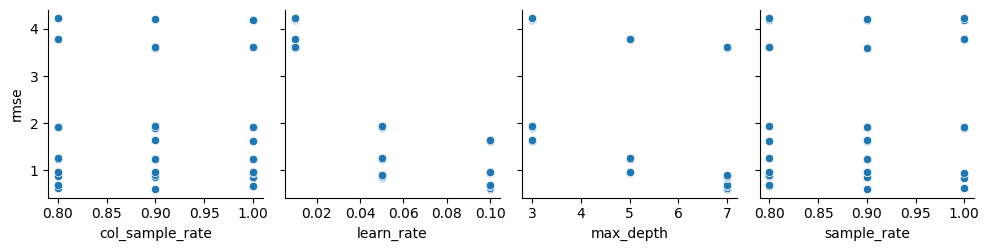

In [65]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["rmse"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)


Given above is a pair plot of the different parameters concerning their RMSE values.

These four parameters **col_sample_rate, learn_rate, max_depth**, and **sample_rate** can be considered important parameters.

#**Questions:**

###1. Is the relationship significant?
- I have observed that the majority of the features possess p-values that are less than 0.5. Additionally, the R^2 value is 0.967, indicating that the relationship between the variables is significant. These findings imply that there is a strong correlation between the analyzed features and they are interdependent.

###2. Are any model assumptions violated?
- Linear regression assumes homoscedasticity, which means that the error distribution should be normally distributed. To check for homoscedasticity, I plotted the residuals against the target variable, and the plot was normally distributed, as the points in the scatterplot are roughly symmetrically distributed, it indicated homoscedasticity and hence did not violate the assumption.
- Linear regression assumes that there is little or no autocorrelation. To test for this, the Durbin-Watson test can be used, with values between 1.5 and 2.5 indicating no autocorrelation. However, during the Durbin-Watson statistic (d), I got a value of 0.705, which is less than 1.5, and is very close to 0, this suggested a strong presence of positive autocorrelation in the residuals of the regression model. This violated the assumption made.
- In linear regression, it is also assumed that the data has little or no multicollinearity. Multicollinearity happens when the independent variables are highly correlated with each other. After analyzing the heatmap, I can confirm that there are a few high absolute values (close to 1) in off-diagonal cells, which suggests strong linear relationships between the independent variables.

###3. Is there any multicollinearity in the model?
- To show the multicollinearity in the model, I used the VIF method to classify variables having VIF value of more than 5 as the ones that showcase multicollinearity.
- 'Infant deaths', 'Percentage expenditure', 'Under-five deaths', 'GDP' were found to be highly correlated.

###4. In the multivariate models are predictor variables independent of all the other predictor variables?
- A heatmap was used for this analysis to show if the predictor variables are independent of all the other predictor variables.
- From the heatmap I was able to confirm that, 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources' and 'Schooling' are correlated with the predictor variable 'Life expectancy'

###5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
- I implemented the "Eli5" in order to print out the most significant and exclude the insignificant variables in the form of a list.
- 'Under-five deaths', 'Infant deaths', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', and 'Schooling' are correlated with the predictor variable 'Life expectancy'.

###6. Does the model make sense?
- In order for a model to be reliable, it needs to adhere to certain assumptions and have a p-value and VIF that fall within their respective ranges.
- The RMSE should also be as low as possible, taking into account the minimum and maximum values of the target variable. However, in our model, the RMSE is 1.58, which is significantly higher than what is desirable. To improve the accuracy of a predictive model, data scientists can use various techniques.
- For example, they can perform feature selection by dropping less important variables that do not contribute significantly to the model's performance. Additionally, outliers can be handled by either removing them entirely or by boosting their influence on the model.
- Another option is to implement ensemble models, which combine several individual models to obtain a more accurate prediction.

###7. Does regularization help?
- As stated above, Ridge regularisation was conducted but, there was no significant changes in the model before and after regularisation, hence, the regularisation did not help with the accuracy of the model.

###8. Which independent variables are significant?
- I executed the OLS to study the p-values of the independent variables, and I applied a threshold value on the p-values reading to get a list of independent variables that had p-values less than 0.005. The variables on this list had a significant impact on the dependent variable 'Life expectancy'.

###9. Which hyperparameters are important?
- As I filtered out parameters with respect to their RMSE values, col_sample_rate, learn_rate, max_depth, and sample_rate can be considered important parameters

#**Conclusion**

A core algorithm based on linear regression was created to predict life expectancy. However, some independent variables were thought to be ignored by VIF, p-values, and other tests. The "Health & Development Indicators: Global Insights" dataset's variables were tested and trained using the H20.ai framework. The best model, given as "StackedEnsemble," was found to be able to predict life expectancy to a certain extent. However, the accuracy of the model is still constrained in several areas and requires improvement in future studies. To achieve this, further investigation of the corresponding models can be conducted using a variety of methods, including eliminating outliers and employing ensemble or booster techniques.

#**References**

- H2O documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html
- Linear Regression: https://www.ibm.com/topics/linear-regression#:~:text=Resources-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.
- Github: https://github.com/makarandmadhavi/AutoML-Marketting-Campaign/blob/main/AutoML_Marketting_Campaign.ipynb
- ChatGPT - https://chat.openai.com/chat

60% code is written by me with the other 40% referenced and modified from various sources such as stackoverflow geeksfor. geeks and ChatGPT



#**License**

Copyright 2023 akshitapathania7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.